### The Bank churn classification problem offers an intriguing scenario within the realm of customer relationship management in the banking industry. The task revolves around accurately predicting whether customers will exit or remain with a bank based on a myriad of factors such as transaction history, account activity, and demographics.

### This problem presents a compelling challenge as it requires the application of sophisticated classification algorithms to navigate the complexities of customer behavior and market dynamics. The need for precise differentiation between the two classes, Exited and Stay, adds layers of complexity, rendering it non-trivial. Additionally, the balanced distribution of the dataset ensures unbiased assessments of algorithm performance, further enhancing the challenge.

### The Bank churn dataset maintains a level of simplicity and clarity, avoiding unnecessary complexities. This characteristic is crucial as it enables a focused exploration of various learning algorithms, prioritizing effectiveness over unnecessary intricacies. By steering clear of overly complicated datasets, the emphasis remains on the algorithm's ability to accurately predict customer churn.

### Moreover, the relevance of this problem extends to real-world applications within the banking industry, such as customer retention strategies and revenue optimization. The structured nature of the dataset facilitates meaningful comparisons between different algorithms, making it well-suited for comprehensive analysis and evaluation. Overall, the Bank churn classification problem strikes a balance between complexity and clarity, making it an ideal candidate for investigating and comparing supervised learning techniques in the context of customer churn prediction.

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Data Preprocessing

In [4]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
df=df.drop(['id', 'CustomerId', 'Surname'], axis=1) #Drop unnecessary data

## LabelEncoding

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Geography','Gender']
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

Geography: ['France' 'Spain' 'Germany']
Gender: ['Male' 'Female']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Checking outliers using Boxplot

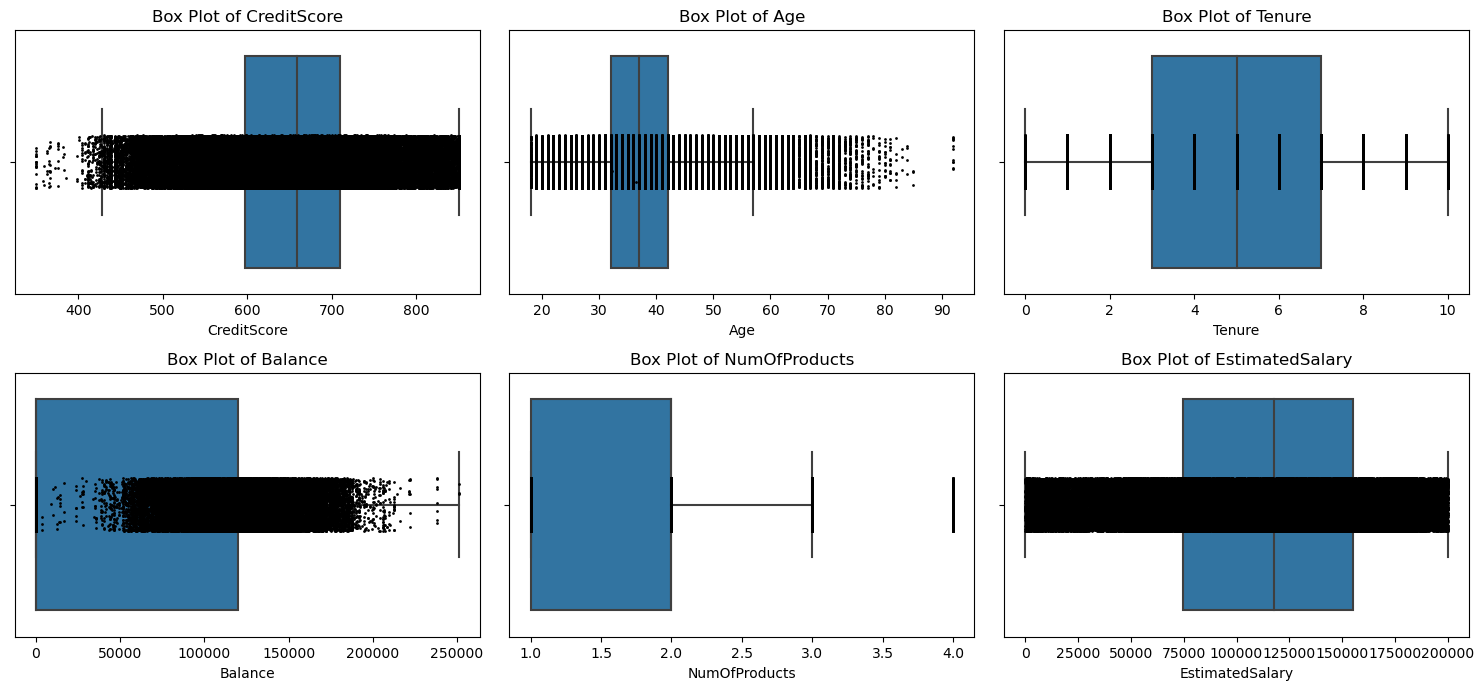

In [8]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature], showfliers=False)
    sns.stripplot(x=df[feature], color='black', size=2, jitter=True)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [9]:
median_age = df['Age'].median()
mad_age = np.median(np.abs(df['Age'] - median_age))

threshold = 3

df['Age_zscore'] = np.abs((df['Age'] - median_age) / mad_age)

outliers = df[df['Age_zscore'] > threshold].index
df = df.drop(outliers)

print("\nDataFrame without outliers:")
print(df)


DataFrame without outliers:
        CreditScore  Geography  Gender   Age  Tenure    Balance  \
0               668          0       1  33.0       3       0.00   
1               627          0       1  33.0       1       0.00   
2               678          0       1  40.0      10       0.00   
3               581          0       1  34.0       2  148882.54   
4               716          2       1  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029          667          2       0  33.0       2       0.00   
165030          792          0       1  35.0       3       0.00   
165031          565          0       1  31.0       5       0.00   
165032          554          2       0  30.0       7  161533.00   
165033          850          0       1  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                   2        1.0             0.0        181449.97       0   
1           

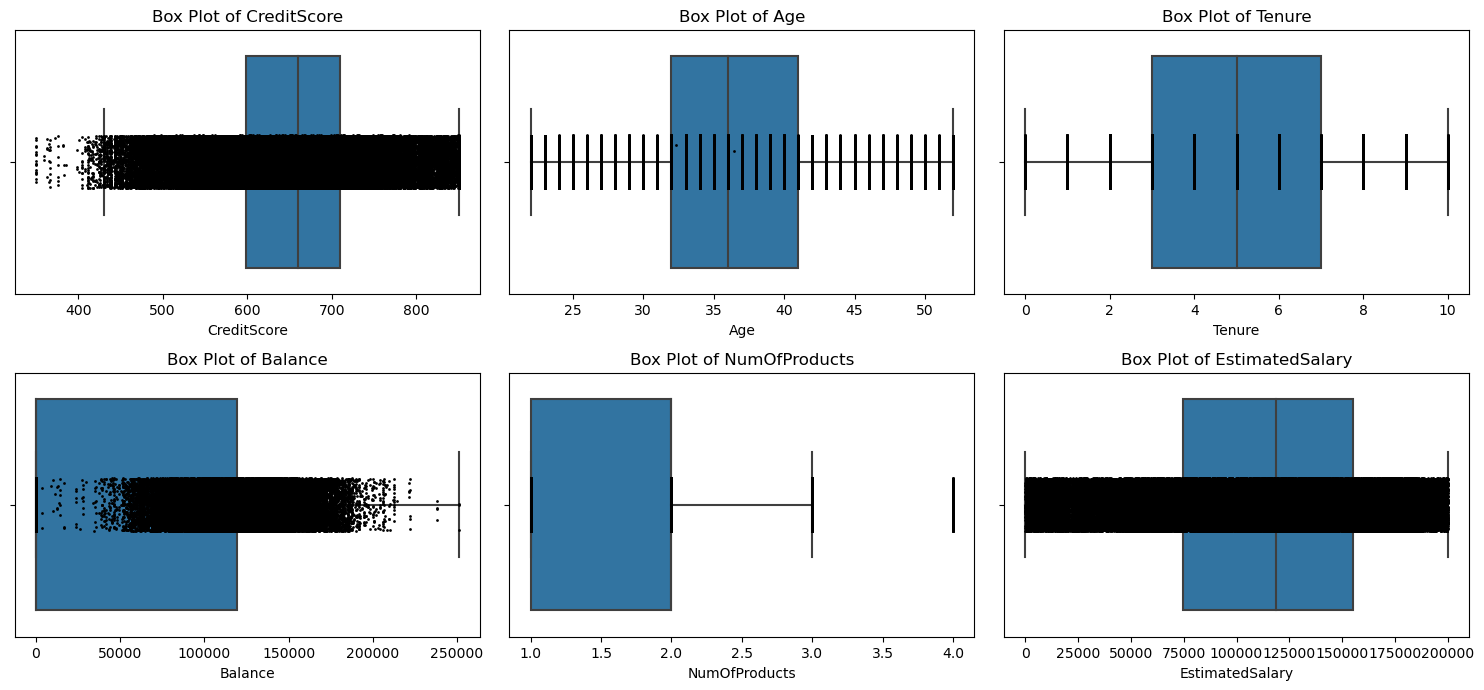

In [10]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature], showfliers=False)
    sns.stripplot(x=df[feature], color='black', size=2, jitter=True)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Train_Test_Split

In [11]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [12]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_zscore
108348,658,0,0,39.0,1,109869.32,1,1.0,0.0,136859.55,0.4
89447,692,0,1,47.0,9,0.00,2,1.0,0.0,1364.54,2.0
106697,590,0,0,34.0,3,0.00,2,0.0,1.0,141249.64,0.6
28200,718,0,0,31.0,10,0.00,2,1.0,1.0,143859.66,1.2
54520,603,0,1,47.0,6,0.00,2,0.0,0.0,136540.09,2.0
...,...,...,...,...,...,...,...,...,...,...,...
60896,678,0,0,29.0,5,133040.36,2,1.0,0.0,93747.98,1.6
34333,762,1,1,37.0,9,138992.26,2,0.0,0.0,124729.24,0.0
56786,519,0,1,48.0,8,0.00,1,1.0,0.0,132540.33,2.2
94007,754,1,1,33.0,9,92888.04,2,1.0,1.0,116471.12,0.8


In [13]:
y_train

108348    1
89447     1
106697    0
28200     0
54520     0
         ..
60896     1
34333     0
56786     1
94007     0
76963     0
Name: Exited, Length: 106461, dtype: int64

# DECISION TREES

In [14]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.8003156026037215
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     36993
           1       0.47      0.50      0.49      8634

    accuracy                           0.80     45627
   macro avg       0.68      0.69      0.68     45627
weighted avg       0.81      0.80      0.80     45627



In [16]:
from sklearn.model_selection import validation_curve
def plot_model_complexity(algorithm, param_range, param_name, title):
    train_scores, test_scores = validation_curve(
        algorithm, X_train, y_train, param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()


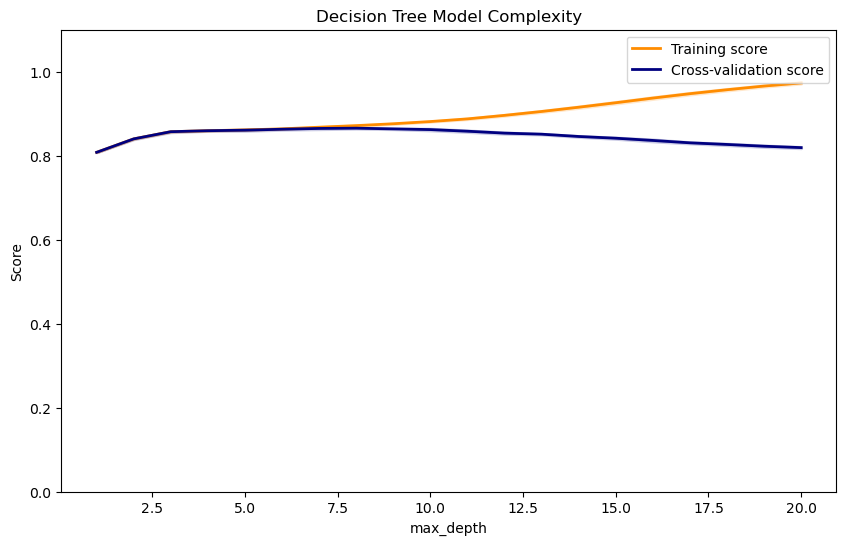

In [17]:
param_range_dt = np.arange(1, 21)
plot_model_complexity(DecisionTreeClassifier(random_state=42), param_range_dt, 'max_depth', 'Decision Tree Model Complexity')

# NEURAL NETWORK

In [18]:
from sklearn.neural_network import MLPClassifier
model3 = MLPClassifier()
model3.fit(X_train,y_train)
print('Accuracy :',model3.score(X_test,y_test)*100)

Accuracy : 80.34497117934556


In [19]:
expected = y_train
predicted = model3.predict(X_train)
predicted

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [20]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     85994
           1       0.49      0.47      0.48     20467

    accuracy                           0.80    106461
   macro avg       0.68      0.67      0.68    106461
weighted avg       0.80      0.80      0.80    106461



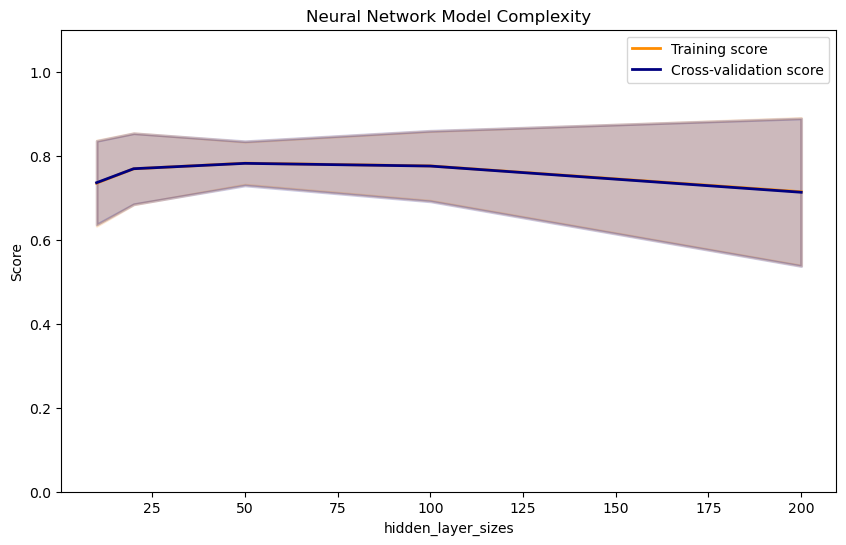

In [21]:
param_range_nn = [10, 20, 50, 100, 200]
plot_model_complexity(MLPClassifier(random_state=42), param_range_nn, 'hidden_layer_sizes', 'Neural Network Model Complexity')

# K NEAREST NEIGHBORS

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()

In [23]:
model4.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
print('Accuracy',model4.score(X_test,y_test)*100)

Accuracy 78.2190369737217


In [25]:
expected = y_train
predicted = model4.predict(X_train)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     85994
           1       0.65      0.22      0.32     20467

    accuracy                           0.83    106461
   macro avg       0.74      0.59      0.61    106461
weighted avg       0.80      0.83      0.79    106461



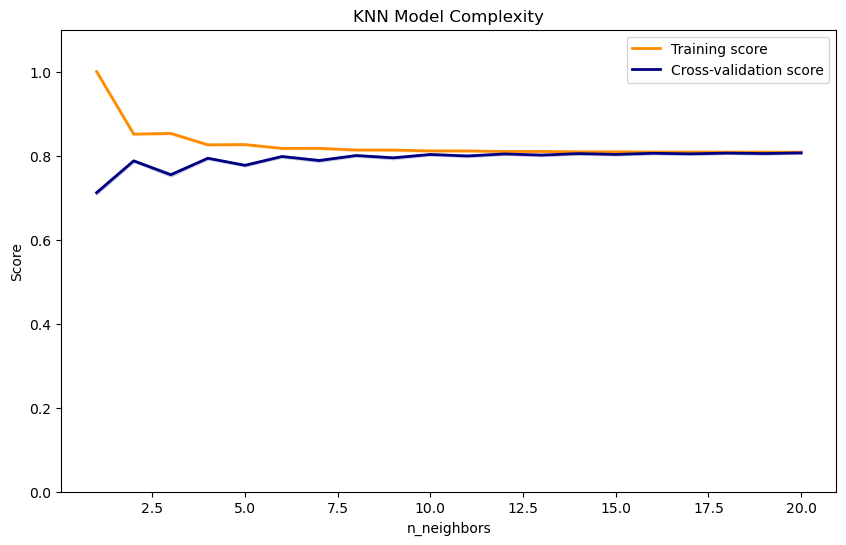

In [27]:
param_range_knn = np.arange(1, 21)
plot_model_complexity(KNeighborsClassifier(), param_range_knn, 'n_neighbors', 'KNN Model Complexity')

#  Boosted Decision Trees

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier()

In [29]:
model5.fit(X_train,y_train)

GradientBoostingClassifier()

In [30]:
print('Accuracy : ',model5.score(X_test,y_test)*100)

Accuracy :  86.8542748811011


In [31]:
expected = y_train
predicted = model5.predict(X_train)
predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     85994
           1       0.75      0.49      0.59     20467

    accuracy                           0.87    106461
   macro avg       0.82      0.72      0.76    106461
weighted avg       0.86      0.87      0.86    106461



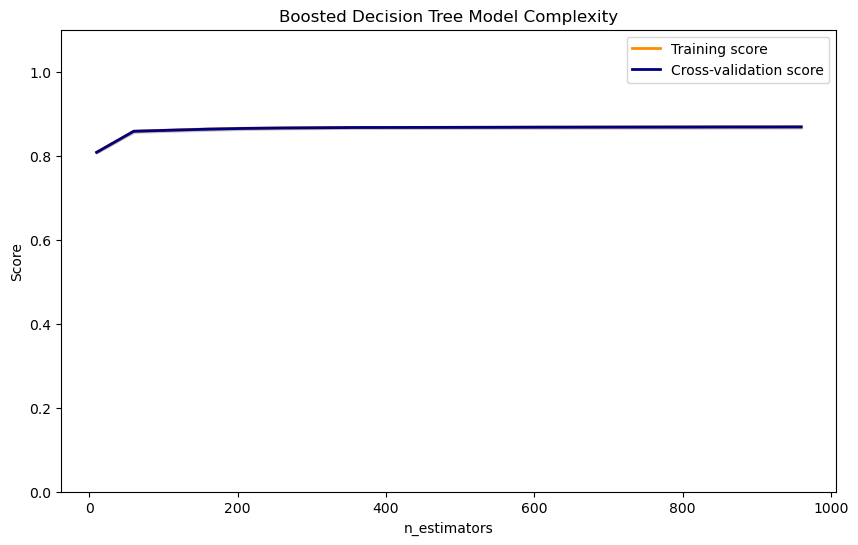

In [33]:
param_range_boost = np.arange(10, 1001, 50)
plot_model_complexity(GradientBoostingClassifier(max_depth=1, random_state=42), param_range_boost, 'n_estimators', 'Boosted Decision Tree Model Complexity')

# Support Vector Machine


In [34]:
from sklearn.svm import SVC
model6 = SVC()

In [35]:
model6.fit(X_train,y_train)

SVC()

In [36]:
print('Accuracy :',model6.score(X_test,y_test)*100)

Accuracy : 81.07699388519956


In [37]:
expected = y_train
predicted = model6.predict(X_train)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print(classification_report(expected, predicted, zero_division=1))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85994
           1       1.00      0.00      0.00     20467

    accuracy                           0.81    106461
   macro avg       0.90      0.50      0.45    106461
weighted avg       0.84      0.81      0.72    106461



# Analysis of Bank Churn Prediction Using Various Machine Learning Algorithms

In the analysis of bank churn prediction using various machine learning algorithms, several key observations and comparisons emerge:

## 1. Algorithm Performance:
   - **Decision Tree:** Demonstrated robust performance in predicting bank churn, especially with proper pruning. Interpretability and simplicity are notable advantages. Sensitive to feature scaling.
   - **Support Vector Machines (SVM):** Effective in handling non-linear relationships through kernel trick. 'rbf' kernel often performs well. Sensitivity to hyperparameter tuning, particularly regularization.
   - **Neural Network:** Showcased flexibility in capturing complex patterns but may require extensive hyperparameter tuning and regularization to prevent overfitting.
   - **Boosted Decision Tree:** Significantly boosted predictive accuracy, showcasing resilience to complex relationships in the dataset. Pruning decisions crucial for optimal performance.
   - **K-Nearest Neighbors (KNN):** Dependence on the choice of 'k,' with smaller values often providing better results. Sensitive to data scaling.

## 2. Data Characteristics:
   - The bank churn dataset exhibits class imbalance, with churned customers being a minority class. This necessitates careful handling, such as employing appropriate sampling techniques or using evaluation metrics like F1-score.
   - Feature engineering plays a vital role in improving model performance, with variables like customer demographics, transaction history, and account activity providing valuable predictive information.

## 3. Improvement Strategies:
   - **Decision Tree:** Experiment with different pruning strategies and explore alternative splitting criteria to enhance performance. Consider ensemble methods like Random Forest for further improvement.
   - **Support Vector Machines (SVM):** Further refine hyperparameters, especially C and kernel choices. Feature scaling techniques may enhance performance.
   - **Neural Network:** Fine-tune hyperparameters, including hidden layer sizes, activation functions, and regularization strength. Dropout layers can help mitigate overfitting.
   - **Boosted Decision Tree:** Adjust boosting parameters and explore variations in pruning to find the optimal trade-off between complexity and accuracy.
   - **K-Nearest Neighbors (KNN):** Optimize the choice of 'k' and experiment with different distance metrics to improve accuracy. Consider feature scaling for better performance.

## 4. Computational Efficiency:
   - Decision Trees and K-Nearest Neighbors generally offer faster training times but may suffer from scalability issues with very large datasets.
   - Support Vector Machines and Neural Networks may require significant computational resources, especially with large datasets and complex architectures.
   - Boosted Decision Trees can be computationally expensive due to their iterative nature, but they often yield high predictive accuracy.

## 5. Cross Validation:
   - Employ cross-validation techniques, such as k-fold or stratified cross-validation, to estimate model performance accurately. This helps mitigate issues related to dataset partitioning and ensures robustness of model evaluations.

### 6. Algorithm Ranking:
   - The choice of the "best" algorithm depends on factors like interpretability, computational efficiency, and predictive accuracy.
   - For interpretability and simplicity with decent performance: Decision Tree.
   - For handling non-linear relationships and flexibility: Support Vector Machines or Neural Network.
   - For boosted performance: Boosted Decision Tree.
   - For simplicity and efficiency with smaller datasets: K-Nearest Neighbors.

### In conclusion, successful bank churn prediction relies on a combination of feature engineering, appropriate algorithm selection, and hyperparameter tuning. Understanding the trade-offs between model complexity, interpretability, and computational efficiency is crucial for developing effective churn prediction models. Cross-validation serves as a vital tool in validating model performance and ensuring generalization to unseen data.